In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

from tensorflow.keras.utils import to_categorical
import tensorflow as tf

from keras.datasets import cifar10

from keras.utils import to_categorical

Öncelikle veri setimizi yüklemek, kullanabilmek bununla birlikte mnodelimizi eğitmek ve veti seti üzerinde işlemler yapabilmek için gerekli kütüphaneleri tanımladık.

In [2]:
(X_train , y_train) , (X_test , y_test) = cifar10.load_data()

Kullanacağımız Veri Seti : CIFAR-10 
    
Bu işlem ile veri setini indirmiş ve test - eğitim seti olarak iki parçaya bölmüş olduk.     

In [3]:
# Veri setimizin içeriğine erişelim

print("X_train hakkında bilgi :", X_train.shape)


print("y_train hakkında bilgi :" , y_train.shape)


X_train hakkında bilgi : (50000, 32, 32, 3)
y_train hakkında bilgi : (50000, 1)


X_train hakkında bilgi : (50000, 32, 32, 3) ==> Bu bilgiler ile anlıyoruz ki veri setimizde 32x32 boyutunda 50000 eğitim örneği var. Görüntüler renkli olduğu için 3 sayısını görüyoruz. (Anlamı : RGB)

y_train hakkında bilgi : (50000, 1) ==> 50000 toplam örnek vardır. 1 ile gösterilen kısım ise görselin hangi sınıfa ait olduğunu belirtmek içindir.


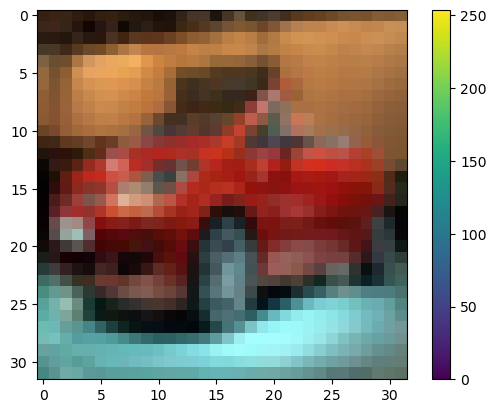

In [4]:
# Görselleştirme

plt.figure()
plt.imshow(X_train[45])
plt.colorbar()
plt.grid(False)
plt.show()

Bu kodlar ile birlikte veri setimizedeki 45. indix olan görüntüyü görselleştirmiş olduk. Görüntüdeki renk değerlerini yorumlayabilmek için colorbar yani renk skalası ekledik.

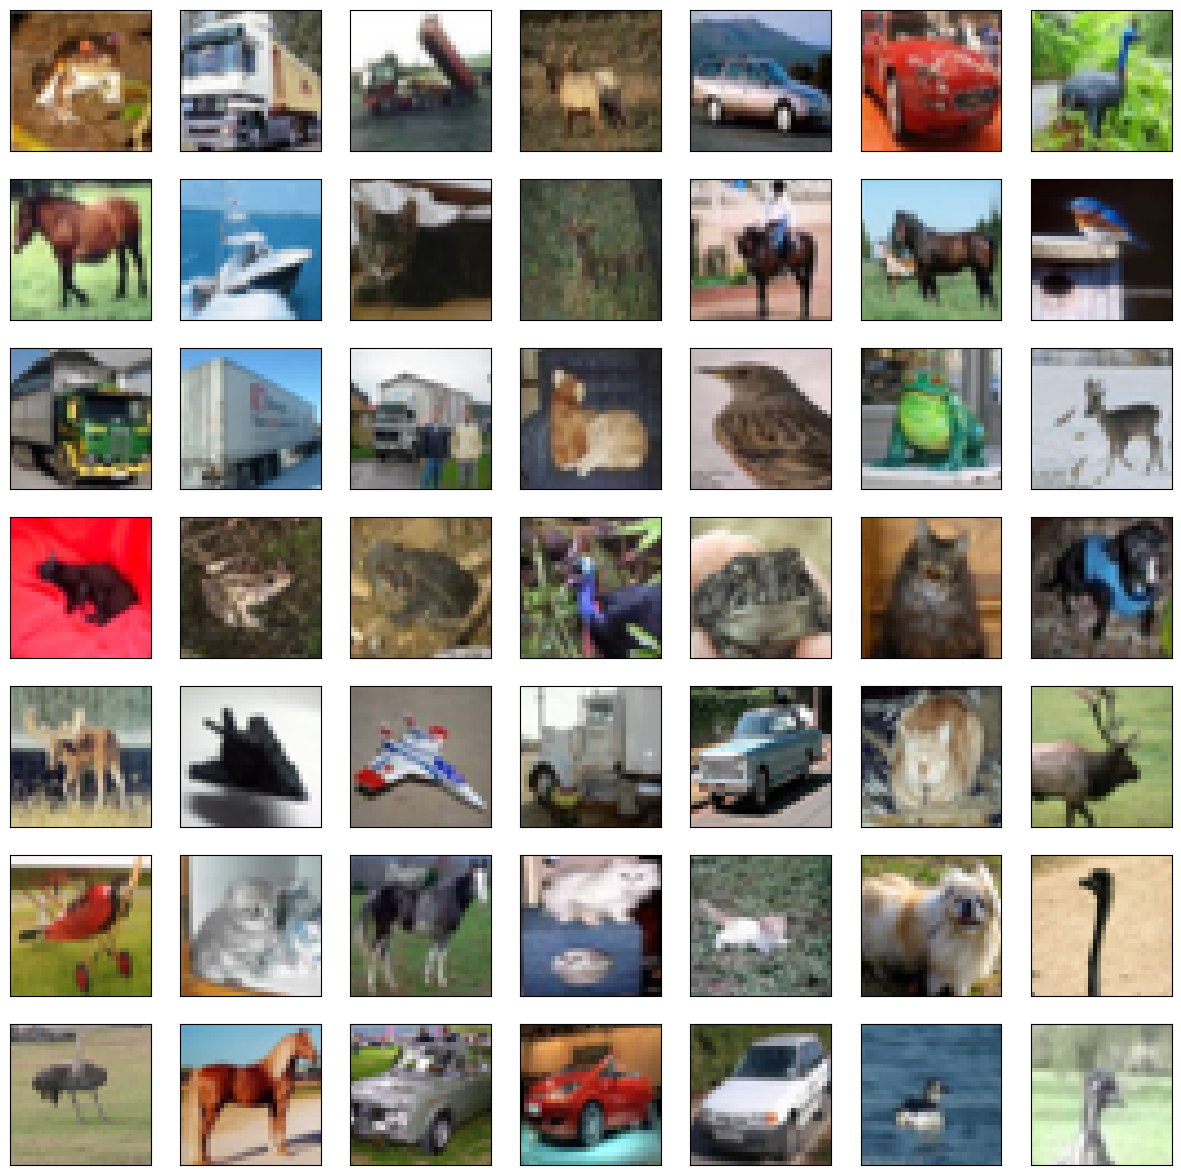

In [5]:
plt.figure(figsize=(15,15))

for i in range(49):
    plt.subplot(7 , 7 , i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow( X_train[i])
plt.show()    


# figsize ile figürün boyutunu ve genişliğini belirledik 
# 49 resmi görselleştirmek için for döngüsü kullandık
# 7 satır - 7 sütun
# x ve y ekseninde bulunan işaretleri kaldırdık
# 

# Model Oluşturma 

In [6]:
y_train = to_categorical(y_train , 10)
y_test = to_categorical(y_test , 10)

**Nedir ?** 

*to_categorical* fonksiyonu, verilen sınıf etiketlerini (örneğin, CIFAR-10'da her bir görüntünün hangi sınıfa ait olduğunu gösteren sayılar) kategorik (one-hot) formata dönüştüren bir işlevdir. Bu dönüşüm, derin öğrenme modellerinin daha iyi çalışabilmesi için gereklidir.

**Örnek :**

Örneğin, bir görüntünün etiketi 3 ise, bu görüntü bir kediyi temsil eder.
to_categorical fonksiyonu, bu etiketi [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] gibi bir vektöre dönüştürür.
Bu vektör, 10 uzunluklu olup, indeks 3 hariç diğer tüm değerleri 0 olarak ayarlar. Bu, sınıfın 3 olduğunu gösterir.

**Neden Gereklidir?**

Derin öğrenme modelleri, genellikle sınıf tahminlerini yaparken çıktı katmanında bir aktivasyon fonksiyonu kullanır. CIFAR-10 gibi çok sınıflı sınıflandırma problemlerinde, çıktı katmanının her düğümü bir sınıfı temsil eder.
Kategorik formatta etiketler, modelin her sınıf için olasılıkları doğru bir şekilde tahmin etmesine yardımcı olur.

In [7]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

Bu adımda **veri normalizasyonu** işlemini yaptık. Peki neden ?

Bu işlemi yapma sebebimiz şu şekilde açıklayalım:

Görüntü pikseller igenelde 0 ile 255 arasında deşir. Bu değerin geniş bir aralıkta olması modlein eğitilmesini zorlaştırabilir ve karmaşıklığı arttırabilir.

Derin öğrenme modellerinde gerçekleştirilen gradyan inişi optimizasyonu, veri değerlerinin benzer aralıklarda olmasını ister. Piksellerin 0 ile 1 arasında olması, optimizasyon sürecinin daha stabil olmasını sağlar.

Normalleştirme işlemi, her piksel değerini 0 ile 1 arasında bir değere ölçeklendirir. Örneğin, bir pikselin orijinal değeri 128 ise, normalleştirme işleminden sonra 0.5 olur.

*************************

In [8]:
num_train, height, width, depth = X_train.shape
X_train = X_train.reshape(num_train, height * width * depth)

num_test, _, _, _ = X_test.shape
X_test = X_test.reshape(num_test, height * width * depth)

**Bu yaptığımız işlem nedir?**

Normal durumlarda KNN iki boyutlu veya daha az boyutlu bir veri bekler. Bizim normal verimizde ise (50000 , 32 , 32 , 3) yani 3 boyutlu bir veri var. 

KNN algoritmasını çalıştırmak için bu görüntüleri düzleştirmek gerekmektedir. Yani her bir görüntüyü tek bir özellik vektörü olarak ele almamız gerekmektedir.

Bu kod X_train ve X_test'i düzleştirerek her bir görüntüyü tek bir özellik vektörüne dönüştürecektir.

In [9]:
X_train.shape

(50000, 3072)

**Göründüğü üzere görsellerimizi tek bir özellik vektörüne dönüştürdük**

******************************

# KNN

In [10]:
knn_model = KNeighborsRegressor().fit(X_train,y_train)

In [11]:
knn_model

KNeighborsRegressor()

In [12]:
knn_model.n_neighbors # -> Komşu sayısı

5

In [13]:
knn_model.metric # -> KNN algoritmasında kullanılan mesafe metriğidir

'minkowski'

In [14]:
knn_model.predict(X_test)[0:5]

array([[0. , 0. , 0.6, 0. , 0.4, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0. ],
       [0.2, 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0. ],
       [0.6, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.4, 0. ],
       [0. , 0. , 0.2, 0. , 0.4, 0.2, 0.2, 0. , 0. , 0. ]])

Predict fonksiyonu ile X_test kümesi üzerinden tahmin yaptık. 

*Peki bu tahmin çıktısı bize ne anlatıyor?*

2.satırı ele alalım. [0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0.] 

=> *Sınıf 1* için tahmin edilen olasılık: %0 (yani, örnek bu sınıfa ait olma olasılığı yok)

=> *Sınıf 2* için tahmin edilen olasılık: %20 

=> *Sınıf 3* için tahmin edilen olasılık: %0

=> *Sınıf 4* için tahmin edilen olasılık: %0

=> *Sınıf 5* için tahmin edilen olasılık: %0

=> *Sınıf 6* için tahmin edilen olasılık: %0

=> *Sınıf 7* için tahmin edilen olasılık: %0

=> *Sınıf 8* için tahmin edilen olasılık: %0.8 (%80)

=> *Sınıf 9* için tahmin edilen olasılık: %0

Bu çıktıya göre, ikinci örneğin KNN modeli tarafından %20 olasılıkla 2. sınıfa ait olduğu tahmin edilmişken, %80 olasılıkla 9. sınıfa ait olduğu tahmin edilmiştir. Bu çıktı, modelin her bir sınıf için örneğin ait olma olasılığını belirttiği bir tahmin sonucudur.


**************************

**Tahmin Aşaması Ve Modelin Performansının Analiz Edilmesi**

In [15]:
y_pred = knn_model.predict(X_test)

In [16]:
y_pred[0:10]

array([[0. , 0. , 0.6, 0. , 0.4, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0. ],
       [0.2, 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0. ],
       [0.6, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.4, 0. ],
       [0. , 0. , 0.2, 0. , 0.4, 0.2, 0.2, 0. , 0. , 0. ],
       [0. , 0. , 0.4, 0. , 0. , 0. , 0.6, 0. , 0. , 0. ],
       [0. , 0. , 0.2, 0.2, 0.2, 0. , 0.4, 0. , 0. , 0. ],
       [0. , 0. , 0.4, 0.2, 0.4, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.2, 0.6, 0. , 0.2, 0. , 0. , 0. ],
       [0.2, 0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0.6, 0. ]])

In [17]:
rmse_degeri = np.sqrt(mean_squared_error(y_test , y_pred))
rmse_degeri

0.29445542956447257

**RMSE (Root Mean Square Error)**  bir regresyon modelinin tahminlerinin gerçek değerlerden ne kadar uzaklıkta olduğunu ölçen bir performans ölçüsüdür. Özellikle tahminlerin doğruluğunu değerlendirmek için kullanılır. RMSE değeri ne kadar düşük olursa, modelin tahminlerinin gerçek değerlere o kadar yakın olduğunu söyleyebiliriz.

Verilen RMSE değeri 0.29445542956447257 olduğuna göre, modelin tahminleri genellikle gerçek değerlerden 0.29445542956447257 birim kadar sapma gösteriyor demektir. Bu değer oldukça düşük bir RMSE değeri olarak yorumlanabilir, bu da modelin genel olarak iyi bir tahmin performansı gösterdiğini ve tahminlerinin gerçek değerlere yakın olduğunu gösterir.

In [18]:
r2_score_knn = np.sqrt(r2_score(y_test, y_pred))
r2_score_knn

0.19136933459190203

**R2 score (R-kare)**, bir regresyon modelinin ne kadar iyi uyum sağladığını ölçen bir istatistiksel ölçüdür. R2 score, bağımsız değişkenlerin bağımlı değişken üzerindeki varyansını ne kadar iyi açıkladığını gösterir. Değerler genellikle 0 ile 1 arasında olur, 1'e ne kadar yakınsa modelin verilere o kadar iyi uyum sağladığı anlamına gelir.

Verilen R2 score değeri 0.19136933459190203 olduğuna göre, modelin bağımsız değişkenlerin varyansının sadece %19.14'ünü açıkladığı söylenebilir. Bu, modelin verilere pek iyi uyum sağlamadığını gösterir ve tahminlerin gerçek değerlerden oldukça uzak olduğunu anlayabiliriz.

******************

In [19]:
# Karışıklık matrisi ve sınıflandırma raporu hesapla
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

**argmax fonksiyonu** genellikle çoklu sınıf sınıflandırma problemlerinde kullanılır. Özellikle tahminler yapıldıktan sonra modelin her bir örneği için hangi sınıfı en yüksek olasılıkla tahmin ettiğini belirlemek için kullanılır.

CIFAR-10 veri seti için 10 farklı sınıf vardır. 10 farklı sınıfa ait toplam 50000 görüntü vardır. argmax fonksiyonu tahmini yapılan görsellere bakar ve en yüksek olasılığa sahip indisi alır.

örnek:

array(

       [[0. , 0. , 0.6, 0. , 0.4, 0. , 0. , 0. , 0. , 0. ],

       [0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0. ],
       
       [0.2, 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0. ],...
       
       
1.Satır İçin => En Yüksek Olasılık *İndex 2* (Bird) 

2.Satır için => En Yüksek Olasılık *İndex 8* (Ship)

3.Satır İçin => En Yüksek Olasılık *İndex 8* (Ship)

In [20]:
cm = confusion_matrix(y_test_labels, y_pred_labels)

**confusion_matrix fonksiyonu**, gerçek (true) ve tahmin edilen (predicted) etiketler arasında karşılaştırma yaparak bir karışıklık matrisi oluşturur.

In [26]:
# CIFAR-10 sınıf adları
CIFAR_10_CLASSES = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

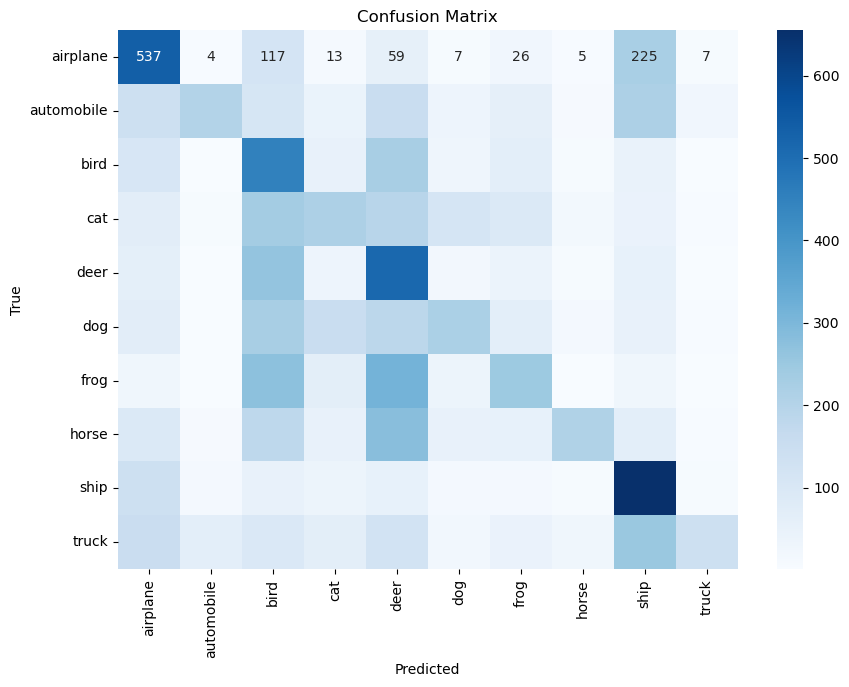

In [27]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CIFAR_10_CLASSES, yticklabels=CIFAR_10_CLASSES)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**sns.heatmap fonksiyonu**, seaborn kütüphanesinde bulunan bir fonksiyondur ve karışıklık matrisini ısı haritası olarak görselleştirir. cm matrisi, annot=True ile hücrelerin içine sayı değerlerini yazdırır. fmt='d' formatı sayıları tamsayı olarak gösterir. cmap='Blues' renk haritası olarak mavi tonları seçilmiştir. xticklabels ve yticklabels parametreleri ile sınıf adlarını belirtilen CIFAR_10_CLASSES listesi olarak etiketlenir.

In [28]:
print(classification_report(y_test_labels, y_pred_labels, target_names=CIFAR_10_CLASSES))

              precision    recall  f1-score   support

    airplane       0.38      0.54      0.45      1000
  automobile       0.65      0.20      0.31      1000
        bird       0.23      0.45      0.30      1000
         cat       0.29      0.22      0.25      1000
        deer       0.24      0.51      0.33      1000
         dog       0.39      0.22      0.28      1000
        frog       0.35      0.25      0.29      1000
       horse       0.68      0.21      0.32      1000
        ship       0.40      0.66      0.50      1000
       truck       0.70      0.14      0.23      1000

    accuracy                           0.34     10000
   macro avg       0.43      0.34      0.33     10000
weighted avg       0.43      0.34      0.33     10000



**classification_report fonksiyonu**, sınıflandırma modelinin performansını ölçmek için farklı metrikler sağlar. Bu rapor, her sınıf için precision, recall, f1-score ve support değerlerini gösterir. target_names parametresi, sınıf adlarını belirtir.

Verilen metindeki sınıflandırma metrikleri şu şekildedir:

- **Precision (Kesinlik)**: Modelin pozitif olarak tahmin ettiği örneklerin gerçekte ne kadarının pozitif olduğunu gösterir. En yüksek precision "truck" (kamyon) sınıfı için (%70), en düşük ise "bird" (kuş) sınıfı için (%23) olarak belirlenmiştir.

- **Recall (Duyarlılık veya Geri Çağrı)**: Gerçek pozitif örneklerin model tarafından ne kadarının doğru şekilde tanımlandığını gösterir. En yüksek recall "ship" (gemi) sınıfı için (%66), en düşük ise "truck" (kamyon) sınıfı için (%14) olarak belirlenmiştir.

- **F1-Score**: Precision ve recall değerlerinin harmonik ortalamasıdır. En yüksek F1-score "ship" (gemi) sınıfı için (%0.50), en düşük ise "truck" (kamyon) sınıfı için (%0.23) olarak belirlenmiştir.

- **Accuracy (Doğruluk)**: Modelin tüm sınıflar üzerinde doğru tahmin yüzdesini gösterir. Verilen metindeki accuracy değeri %34 olarak belirtilmiştir.

- **Support**: Her bir sınıf için gerçekten kaç tane örneğin olduğunu gösterir. Her sınıf için 1,000 örnek olduğu ifade edilmiştir.

- **Macro avg ve Weighted avg**: Macro avg, tüm sınıfların precision, recall ve f1-score ortalamalarını eşit şekilde alır. Weighted avg ise her sınıfın etkisinin sayısal olarak örnek sayısına göre ağırlıklı olduğunu varsayar.

Bu metrikler, modelin CIFAR-10 veri setindeki görüntü sınıflarını tahmin etme performansını ayrıntılı bir şekilde değerlendirir. Düşük precision ve recall değerleri, modelin belirli sınıfları ayırt etmede zorlandığını gösterirken, düşük accuracy genel performansın iyileştirilmesi gerektiğini işaret eder.

In [29]:
# Doğruluk skorunu hesapla
acc = accuracy_score(y_test_labels, y_pred_labels)
print(f'Accuracy: {acc}')

Accuracy: 0.3398


**accuracy_score fonksiyonu**, gerçek etiketlerle tahmin edilen etiketler arasındaki doğru tahmin oranını hesaplar ve doğruluk skorunu verir.

Verilen accuracy (doğruluk) değeri 0.3398, modelin CIFAR-10 veri setindeki test verileri üzerinde doğru tahmin yüzdesini ifade eder. Bu değer, modelin tahminlerinin ne kadarının doğru olduğunu gösterir.

0.3398 değeri, modelin test verileri üzerinde yaklaşık olarak %33.98 doğruluk oranına sahip olduğunu gösterir.